In [1]:
import requests

In [3]:
r = requests.get('http://www.citibikenyc.com/stations/json')

In [7]:
r.json()

{u'executionTime': u'2015-05-11 07:08:08 PM',
 u'stationBeanList': [{u'altitude': u'',
   u'availableBikes': 3,
   u'availableDocks': 34,
   u'city': u'',
   u'id': 72,
   u'landMark': u'',
   u'lastCommunicationTime': None,
   u'latitude': 40.76727216,
   u'location': u'',
   u'longitude': -73.99392888,
   u'postalCode': u'',
   u'stAddress1': u'W 52 St & 11 Ave',
   u'stAddress2': u'',
   u'stationName': u'W 52 St & 11 Ave',
   u'statusKey': 1,
   u'statusValue': u'In Service',
   u'testStation': False,
   u'totalDocks': 38},
  {u'altitude': u'',
   u'availableBikes': 9,
   u'availableDocks': 23,
   u'city': u'',
   u'id': 79,
   u'landMark': u'',
   u'lastCommunicationTime': None,
   u'latitude': 40.71911552,
   u'location': u'',
   u'longitude': -74.00666661,
   u'postalCode': u'',
   u'stAddress1': u'Franklin St & W Broadway',
   u'stAddress2': u'',
   u'stationName': u'Franklin St & W Broadway',
   u'statusKey': 1,
   u'statusValue': u'In Service',
   u'testStation': False,
   u'

In [8]:
r.json().keys()

[u'executionTime', u'stationBeanList']

In [10]:
r.json()['executionTime']

u'2015-05-11 07:08:08 PM'

In [11]:
 r.json()['stationBeanList']

[{u'altitude': u'',
  u'availableBikes': 3,
  u'availableDocks': 34,
  u'city': u'',
  u'id': 72,
  u'landMark': u'',
  u'lastCommunicationTime': None,
  u'latitude': 40.76727216,
  u'location': u'',
  u'longitude': -73.99392888,
  u'postalCode': u'',
  u'stAddress1': u'W 52 St & 11 Ave',
  u'stAddress2': u'',
  u'stationName': u'W 52 St & 11 Ave',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 38},
 {u'altitude': u'',
  u'availableBikes': 9,
  u'availableDocks': 23,
  u'city': u'',
  u'id': 79,
  u'landMark': u'',
  u'lastCommunicationTime': None,
  u'latitude': 40.71911552,
  u'location': u'',
  u'longitude': -74.00666661,
  u'postalCode': u'',
  u'stAddress1': u'Franklin St & W Broadway',
  u'stAddress2': u'',
  u'stationName': u'Franklin St & W Broadway',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 33},
 {u'altitude': u'',
  u'availableBikes': 6,
  u'availableDocks': 21,
  u'city': u'',

In [12]:
len(r.json()['stationBeanList'])

329

In [15]:
key_list=[]
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)
            
key_list

[u'availableDocks',
 u'totalDocks',
 u'city',
 u'altitude',
 u'stAddress2',
 u'longitude',
 u'lastCommunicationTime',
 u'postalCode',
 u'statusValue',
 u'testStation',
 u'stAddress1',
 u'stationName',
 u'landMark',
 u'latitude',
 u'statusKey',
 u'availableBikes',
 u'id',
 u'location']

In [16]:
r.json()['stationBeanList'][0]

{u'altitude': u'',
 u'availableBikes': 3,
 u'availableDocks': 34,
 u'city': u'',
 u'id': 72,
 u'landMark': u'',
 u'lastCommunicationTime': None,
 u'latitude': 40.76727216,
 u'location': u'',
 u'longitude': -73.99392888,
 u'postalCode': u'',
 u'stAddress1': u'W 52 St & 11 Ave',
 u'stAddress2': u'',
 u'stationName': u'W 52 St & 11 Ave',
 u'statusKey': 1,
 u'statusValue': u'In Service',
 u'testStation': False,
 u'totalDocks': 38}

In [18]:
from pandas.io.json import json_normalize

In [19]:
df = json_normalize(r.json()['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,3,34,,72,,None,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,38
1,,9,23,,79,,None,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,6,21,,82,,None,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,11,49,,83,,None,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,0,39,,116,,None,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,3,Not In Service,False,39


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

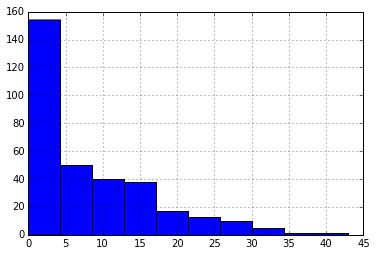

In [21]:
df['availableBikes'].hist()
plt.show()

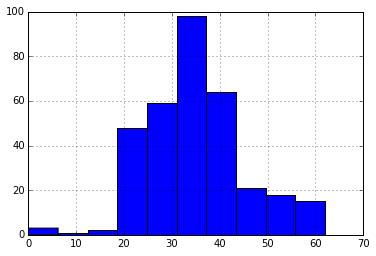

In [22]:
df['totalDocks'].hist()
plt.show()

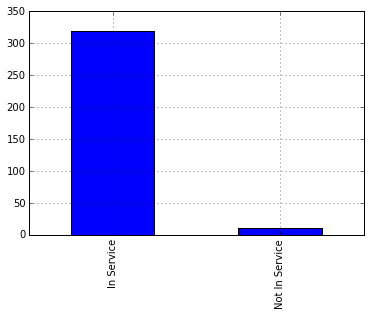

In [31]:
df['statusValue'].value_counts().plot(kind = 'bar')

In [32]:
df.availableBikes.mean()

7.9422492401215807

In [33]:
df.availableBikes.median()

6.0

In [41]:
bikesInServices = df.availableBikes[df.statusValue == 'In Service']

In [42]:
bikesInServices.mean()

8.0877742946708455

In [43]:
bikesInServices.median()

6.0

In [44]:
df['totalDocks'].mean()

34.550151975683889

In [46]:
condition = (df['statusValue'] == 'In Service')
df[condition]['totalDocks'].mean()

34.940438871473354

In [48]:
df['totalDocks'].median()

33.0

In [50]:
df[df['statusValue'] == 'In Service']['totalDocks'].median()

34.0

In [51]:
import sqlite3 as lite

In [52]:
con = lite.connect('citi_bike.db')
cur = con.cursor()

with con:
    cur.execute('CREATE TABLE citibike_reference (id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT)')

In [53]:
sql = 'INSERT INTO citibike_reference (id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)'

In [54]:
with con:
    for station in r.json()['stationBeanList']:
        cur.execute(sql, (station['id'],station['totalDocks'],station['city'],station['altitude'],station['stAddress2'],station['longitude'],station['postalCode'],station['testStation'],station['stAddress1'],station['stationName'],station['landMark'],station['latitude'],station['location']))

In [72]:
with con:
    cur.execute('DROP TABLE IF EXISTS available_bikes')
station_ids = df ['id'].tolist()

station_ids = ['_' + str(x) + ' INT' for x in station_ids]

with con:
    cur.execute("CREATE TABLE available_bikes ( execution_time INT, " + ", ".join(station_ids) + ");")

In [59]:
import time
from dateutil.parser import parse
import collections

In [61]:
exec_time = parse(r.json()['executionTime'])
exec_time

datetime.datetime(2015, 5, 11, 19, 8, 8)

In [62]:
with con:
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%s'),))

In [73]:
id_bikes = collections.defaultdict(int)

for station in r.json()['stationBeanList']:
    id_bikes[station['id']] = station['availableBikes']
    

with con:
    for k, v in id_bikes.iteritems():
        cur.execute("UPDATE available_bikes SET _" + str(k) + " =" + str(v) + " WHERE execution_time = " + exec_time.strftime('%s') + ";")